# Linear Regression

We start by the presentation of the optimization of the parameters of the Linear Regression. 
Computing an application of the normal equation as minimizer of the RMSE of the cos function for a inear Regression

In [2]:
import numpy as np

# 100 samples from a uniform distribution on [0,1]
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

# We now compute the theta hat

X_b = np.c_[np.ones((100,1)), X] #We add the intercept
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #The computation 

# Gradient Descent

Gradient Descent is a generic optimization method capable of finding solutions to a wide range of problems. The general idea is to tweak the parameters iteratively in order to minimize a cost function. 

Concretely we start by randomly initializing the parameters, then improving gradually by taking steps in the direction of steepest descent and refreshing the parameters proportionnally to the value of the gradient. The learning step is proportional to the slop of the cost function, meaning that the steps get tinier and tinier as we get closer to the optimum of the cost function. 

The learning rate must be well chosen; if it is too small, the algorithm will take too long to converge. If it is too large, we may miss the optimum, and the algorithm will diverge.

The cost function is also important, as its analytical properties highly influence the success of the optimization, by either plateau-ing or converging towards a local minimum.  

When using Gradient Descent, all features should also have a similar scale, or otherwise it will take too long to converge. 

# Batch Gradient Descent

To implement gradient descent one needs to compute the gradient of the cost function with regard to each model parameter. The expression of the gradient for the MSE cost function is $ \frac{2}{m} X^{T}(X\theta - y)$. The gradient is computed using the whole size of the training set, which means it is very slow for large training sets. However Gradient Descent scales very well with large numbers of features, much faster than computing the normal equation, where it must compute the inverse of a matrix.



# Mini Batch Gradient Descent

The mini batch gradient descent is an algorithm that is between the Batch Gradient Descent and the Stochastic Gradient Descent. The gradients are this time computed on small random sets of instances called mini-batches. 

# Polynomial Regression

# Learning Curves

A way to decide whether a model is too complex or too simple is to look at how it performs on train and cross-validation metrics.
If it fits well on the training set but bad on the test set it is probably over fitting, if it fits bad on both it is under fitting. 
Another way to tell is to plot the learning curves. These are plots of the models performance on the training and test sets. 

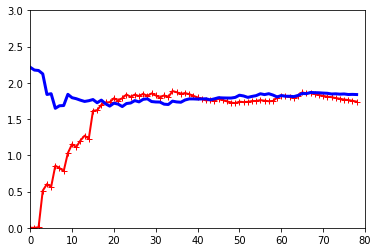

In [3]:
# The code to plot the learning curves of a given model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to plot the learning curves given a model, a set of data, and a target feature
def plot_learning_curves(model, X, y):
    
    # We split the data into training and evaluating 
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    
    # We store the errors for both sets
    train_errors, val_errors = [],[]
    
    # We take bigger and bigger sets
    for m in range(1,len(X_train)):
        
        # We fit the model
        model.fit(X_train[:m], y_train[:m])
        
        # We predict the values for the training set
        y_train_predict = model.predict(X_train[:m])
        
        # We predict on the validation set
        y_val_predict = model.predict(X_val)
        
        # We store the RMSE
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))    
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.axis([0,80,0,3])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val") 
    
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

This model is underfitting. When the model is trained on one of two instances it fits them perfectly, but as soon as the data gets larger the model has more and more trouble fitting it. Then, it fits as good as it can, but then plateau's, because the data being non-linear a linear model won't be able to do much more. 

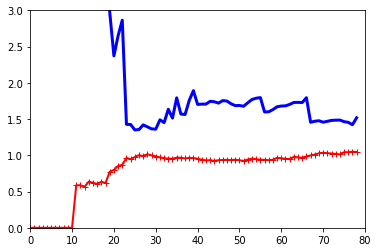

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
    
])

plot_learning_curves(polynomial_regression, X, y)

## Ridge Regression
Ridge regression is a regularized version of *Linear Regression*, where a regularized term equal to $\alpha\sum_{i=1}^{n}\theta^2$ is added to the cost function. The regularization is used to reduce overfitting by reducing the number of dimensions in the model. For a linear model the regularization is typically achieved by constraining the weigths of the model. 

The bias term is not regularized in this regularization. It is important to scale the data as it is sensitive to the scale of the input features. 

In [5]:
# To perform a Ridge Regression, using a closed-form solution 
# computed with a matrix factorization technique by André-Louis Cholesky
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.13481162]])

In [6]:
# To optimize by SGD, the l2 argument is to add a penalization term
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.11036405])

## Lasso Regression

Lasso regression is the same as the ridge regression except it uses the L1 norm. 

## Elastic Net

It's a middle ground between ridge and lasso penalization. The cost function becomes : 

$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta^2$

The r ration is the mix ratio.

Generally, plain linear regression should always be avoided, and ridge regression is a good default. 

In [7]:
from sklearn.linear_model import ElasticNet
# The l1 ratio is the mix ratio r
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.10288381])

## Early Stopping 

Is a different form of training, which consists of stopping the training as soon as the validation error reaches a minimum. 

Sometimes it may not be easy to realize when you've reached the minimum. The strategy is to stop after the error has been above the minimum for sometime then roll back the parameters up to the point of the minimum. 

It is important to scale the data as most regularized methods are sensitive to the scale of the data. 

In [8]:
# Implementation of early stopping 

from sklearn.pipeline import Pipeline
from sklearn.base import clone 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Data pipeline
## Scaling the data for regularization
poly_scaler = Pipeline([
    
    # Adding degrees up until the 90th degree
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    
    # Scaling the data for regularization
    ("std_scaler", StandardScaler())  
    
])

# Building the data sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

# Transforming the data 
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# The regressor 

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start=True, 
                      penalty = None, learning_rate = "constant", eta0 = 0.0005)


minimum_val_error = float("inf")

# We keep the epoch of the best model in memory
best_epoch = None

# We keep the best model
best_model = None

for epoch in range(1000):
    
    # The model is retrained at each epoch by starting where it left off
    # thanks to the warm start parameter
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())

    # The model predicts 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    # The error is computed 
    val_error = mean_squared_error(y_val, y_val_predict)

    # We test to see if the model scores a smaller error
    if val_error < minimum_val_error:
        
        minimum_val_error = val_error
        best_epoch = epoch 
        best_model = clone(sgd_reg)

print(best_epoch)

987


# Logistic Regression 

Used to estimate probabilities. Returns 1 if the probability is greater than 50% and 0 otherwise. 

How to estimate the probabilities ? 
The logistic regression computes a weighted sum of the input features and outputs the logistic of this result (sigmoid). 

The logistic model is trained by minimizing the log loss

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}log(\widehat p)+ (1-y^{(i)}log(1-\widehat p^{(i)})] $ 

Their is no closed-form equation to compute the minimum of the function. The good news is the cost function is convex so optimization will always find the global minimum. 

## Decision Boundaries

Let's try to build a classifier that detects  the type of a flower based on the petal width feature. 

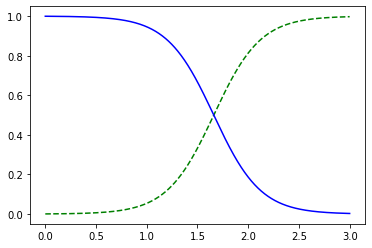

In [9]:
# Importing the dataset 
from sklearn import datasets

# The Iris dataset
iris = datasets.load_iris()
list(iris.keys())

# Classifier based only on the petal width 
X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int) # convert classes to either 2 or not 2 

# Training the Logistic Regressor 

from sklearn.linear_model import LogisticRegression

# Initializing and training the model
log_reg = LogisticRegression()
log_reg.fit(X,y)

# Create a new array containing simulated values for flowers with petals from 0 to 3 cms 
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,1], "g--", label = "Iris virginica")
plt.plot(X_new, y_proba[:,0], "b-", label = "Not Iris virginica")

# Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly without having to train and combine multiple binary classifiers. Its called the SoftMax Regression or Multinomial Logistic Regression. 

The softmax regression computes a score for each class then estimates the probability of each classby applying the softmax function to the scores. 

The function used to measure the accuracy of the predictilon is the cross entropy function : 

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{i=1}^{K} y_{k}^{(i)}log(\widehat p_{k}^{(i)}) $ 

The optimization is then used to reach the optimal set of parameters $\theta$ 

In [20]:
# Computing the Softmax Regression 

X = iris["data"][:,(2,3)] # Petal length and width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X,y)
softmax_reg.predict_proba([[5,2]])

# This will get us the probabilities of being in each class

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Batch Gradient Descent with early stopping for softmax regression

In [ ]:
## 
from sklearn.pipeline import Pipeline
from sklearn.base import clone 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Data pipeline
## Scaling the data for regularization
poly_scaler = Pipeline([
    
    # Adding degrees up until the 90th degree
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    
    # Scaling the data for regularization
    ("std_scaler", StandardScaler())  
    
])

# Building the data sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

# Transforming the data 
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#Best Epoch and best model
best_epoch = None
best_model = None
minimum_val_error = float("inf")

#We initialize the parameters for the 

# Since it is a batch gradient descent we need
# to compute the the gradient 

for epoch in range(1000):
    
    































